 PROJECT: Handwritten Digit Recognition using CNN (MNIST)

**Description:**

This project builds a Convolutional Neural Network (CNN)

to recognize handwritten digits (0–9) from the MNIST dataset.

It includes model training, evaluation, and custom image prediction

with additional logic for even/odd, looped/straight classification.

**STEP 1**: Import Libraries

In [ ]:
!pip install tensorflow matplotlib scikit-learn seaborn --quiet

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from google.colab import files
import seaborn as sns
import cv2

STEP 2: Load and Preprocess Dataset

In [ ]:
print("📥 Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to include channel dimension & normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"✅ Training samples: {x_train.shape[0]}, Testing samples: {x_test.shape[0]}")

📥 Loading MNIST dataset...
✅ Training samples: 60000, Testing samples: 10000


**STEP 3**: Build CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("\n✅ CNN Model Compiled Successfully!")



✅ CNN Model Compiled Successfully!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**STEP 4**: Train the Model

In [ ]:
print("\n🚀 Training CNN Model...")
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1, verbose=1)


🚀 Training CNN Model...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - accuracy: 0.8244 - loss: 0.5783 - val_accuracy: 0.9805 - val_loss: 0.0668
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9745 - loss: 0.0832 - val_accuracy: 0.9860 - val_loss: 0.0494
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.9832 - loss: 0.0545 - val_accuracy: 0.9893 - val_loss: 0.0375
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.9874 - loss: 0.0434 - val_accuracy: 0.9918 - val_loss: 0.0314
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.9896 - loss: 0.0340 - val_accuracy: 0.9907 - val_loss: 0.0316


** STEP 5**: Evaluate Model on Test Data

In [ ]:
loss, acc = model.evaluate(x_test, y_test_cat)
print(f"\n✅ CNN Test Accuracy: {acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9880 - loss: 0.0327

✅ CNN Test Accuracy: 99.04%


**STEP 6**: Model Performance Metrics

In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("\n📈 Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy*100:.2f}%")
print(f"Precision : {precision*100:.2f}%")
print(f"Recall    : {recall*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step

📈 Model Evaluation Metrics:
Accuracy  : 99.04%
Precision : 99.05%
Recall    : 99.03%


** STEP 7**: Confusion Matrix Visualization

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


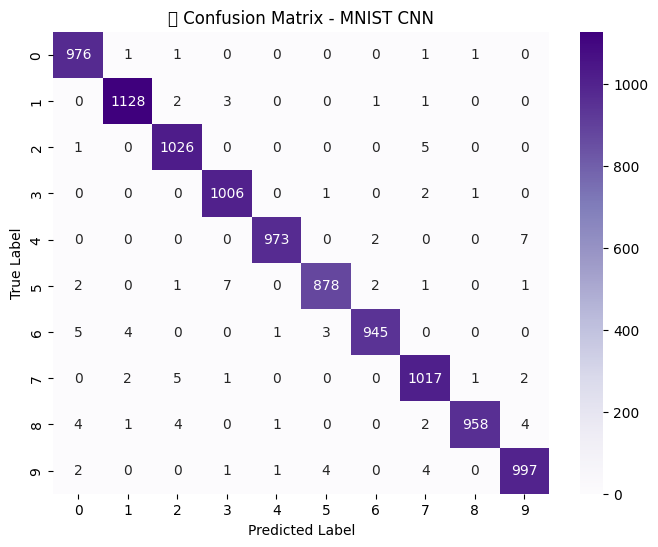

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("🧩 Confusion Matrix - MNIST CNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**STEP 8**: Classification Report

In [ ]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**STEP 9**: Visualize Training History

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


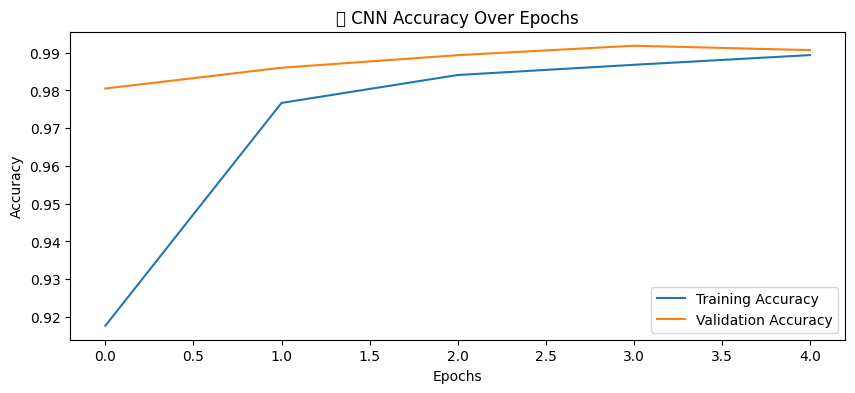

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


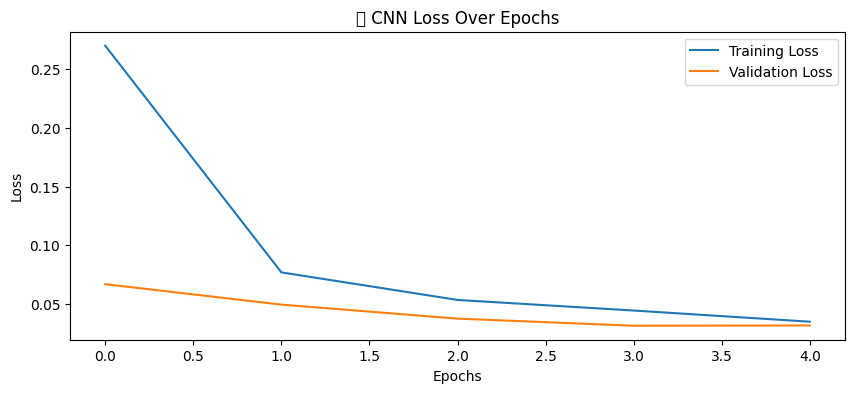

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("📊 CNN Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("📉 CNN Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**STEP 10**: Upload and Predict Custom Digit Image


📤 Upload your digit image (PNG/JPG):


Saving screen-shot-2015-09-19-at-10-13-20-pm.png to screen-shot-2015-09-19-at-10-13-20-pm.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

🧠 Predicted Digit: 6 👌
Type: Even, Shape: Looped


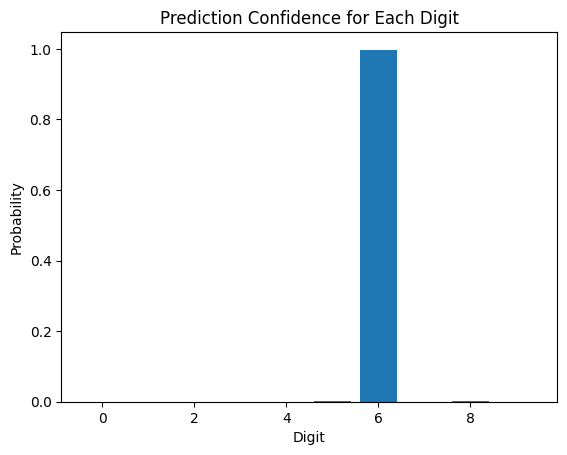

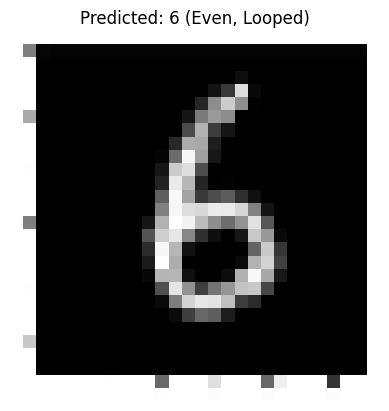

In [ ]:
print("\n📤 Upload your digit image (PNG/JPG):")
uploaded = files.upload()

for fn in uploaded.keys():
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))

    if np.mean(img) > 127:
        img = 255 - img  # Invert if background is white

    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    # Prediction
    pred_prob = model.predict(img)
    pred_digit = np.argmax(pred_prob)

    # Custom logic
    digit = pred_digit
    even_odd = "Even" if digit % 2 == 0 else "Odd"
    loop_shape = "Looped" if digit in [0, 6, 8, 9] else "Straight"

    # Emoji map
    digit_emojis = {0: "⭕", 1: "☝", 2: "✌", 3: "🤟", 4: "🖖", 5: "🖐", 6: "👌", 7: "👆", 8: "🎱", 9: "🔟"}

    print(f"\n🧠 Predicted Digit: {digit} {digit_emojis.get(digit, '')}")
    print(f"Type: {even_odd}, Shape: {loop_shape}")

    # Confidence chart
    plt.bar(range(10), pred_prob[0])
    plt.title("Prediction Confidence for Each Digit")
    plt.xlabel("Digit")
    plt.ylabel("Probability")
    plt.show()

    # Display image
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {digit} ({even_odd}, {loop_shape})")
    plt.axis('off')
    plt.show()
